In [2]:
from manim import *

# 1. Static Scenes

This first chapter serves as an introduction to the fundamentals of placing and animating "mobjects" (**m**athematical **objects**) in a manim scene. Because learning works better (and is much more enjoyable) by doing, you can recreate the below animation of the Riemann sum. Don't be bothered by the term "static", you will find out about "true" dynamism soon enough in the second chapter.

<video controls width="50%" src="external_media/Ch1_example_Scene.mp4" loop="true"></video>

Manim Community v0.19.0

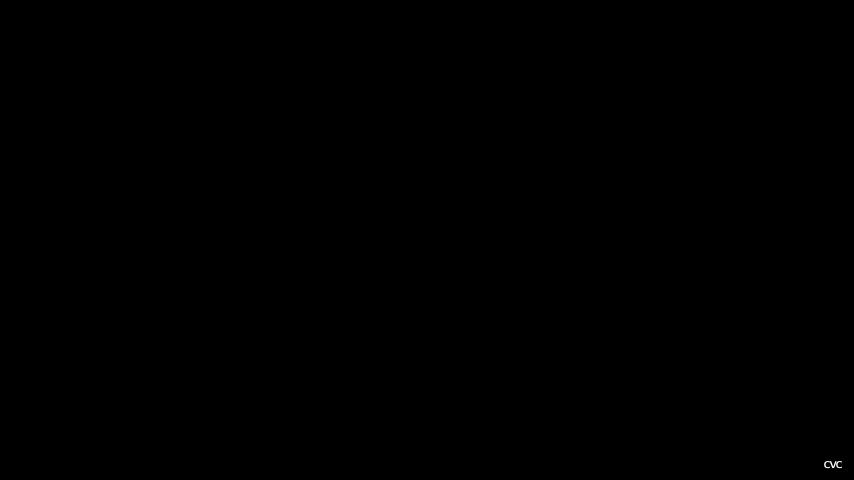

In [45]:
%%manim -ql --fps 60 -v WARNING --disable_caching riemann_recreated_Scene


class riemann_recreated_Scene(Scene):
	def construct(self):
		# my initials: remove if you wish
		CVC = Text('CVC', font_size = 12, weight = BOLD, color = WHITE, font = 'Latin Modern Sans').align_on_border(RIGHT + DOWN, buff = 0.2)
		self.add(CVC)

## 1.1 Placing Objects

### Mobjects (Circles, Squares, Lines)

Manim has plenty of pre-build geometric mobjects like lines, squares, or circles. More [line-like mobjects](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.line.html#module-manim.mobject.geometry.line) like arrows or other [simple geometric shapes](https://docs.manim.community/en/stable/reference/manim.mobject.geometry.polygram.html) and their respective attributes can be found on the (highly recommended) documentation site.

Certain attributes respecive color, stroke width, and opacity work with several geometric shapes. Feel free to try them out:

* ``color``
* ``stroke_color``
* ``opacity``
* ``stroke_opacity``
* ``stroke_width``

Manim Community v0.19.0

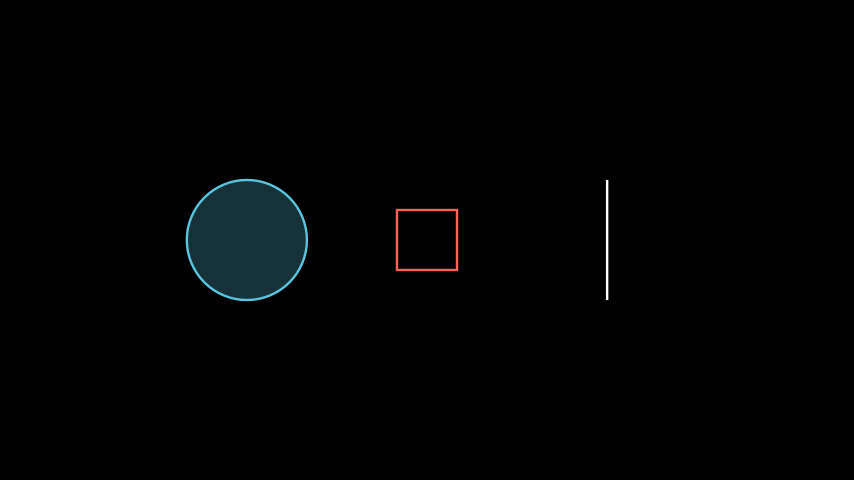

In [3]:
%%manim -ql --fps 60 -v WARNING --disable_caching first_Scene


class first_Scene(Scene):
	def construct(self):
		# defining a square mobject
		first_square = Square(side_length = 1, color = RED)

		# defining a circle mobject and shifting it 3 units to the left
		first_circle = Circle(radius = 1, color = BLUE, fill_opacity = 0.25).shift(3*LEFT)

		# defining a line with start and end coordinate
		first_line = Line(start = [3, 1, 0], end = [3, -1, 0], color = WHITE, stroke_width = 4)

		# adding all mobjects to the scene
		self.add(first_square, first_circle, first_line)

### Placing Mobjects

As hinted in the previous notebooks, there are several ways to place mobjects into the scene. However, it is first helpful to understand the geometry of a manim scene. It is around **14.22 units wide** and **8 units high** and therefore has a format of 16:9. 

The internal coordinates are given by an array / tuple / list of three coordinates $x, y, z$. The coordinate $z$ is perpendicular to the screen and the center of the frame is given as [0, 0, 0]. Directional numpy arrays are predifined as follows and can be quite useful:

* ``UP``:		[0, 1, 0]
* ``DOWN``: 	[0, -1, 0]
* ``LEFT``: 	[-1, 0, 0]
* ``RIGHT``: 	[1, 0, 0]

For placing mobjects, manim offers a wide [range of options](https://docs.manim.community/en/stable/reference/manim.mobject.mobject.Mobject.html). Some of the most popular ones that can also be found in the notebooks are the following:

* ``move_to()``: takes the coordinate the mobject is supposed to be placed at
* ``next_to()``: takes another mobject as reference and the direction as a second argument
* ``align_on_border``: takes a direction to the respective border of the frame
* ``shift()``: shifts the mobject by the given direction

Manim Community v0.19.0

width of a manim scene:		14.222222222222221
height of a manim scene:	8.0


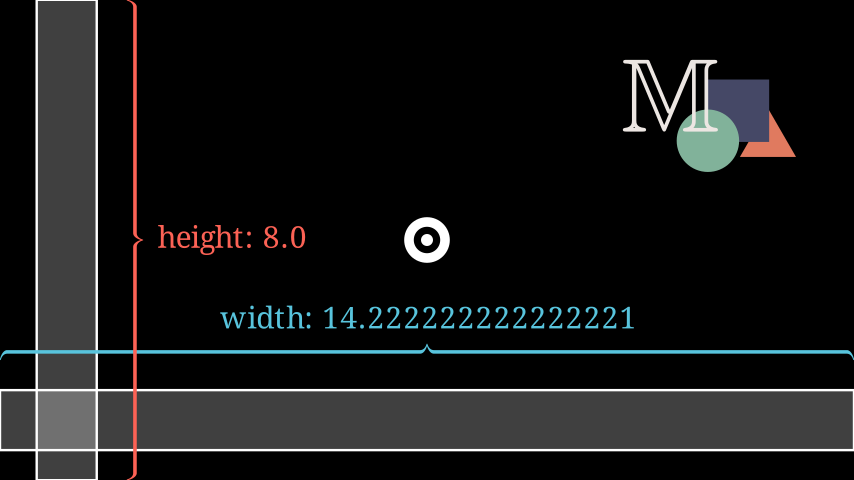

In [4]:
%%manim -ql --fps 60 -v WARNING --disable_caching geometry_Scene


class geometry_Scene(Scene):
	def construct(self):
		# scene geometry
		frame_width = config.frame_width
		frame_height = config.frame_height

		# printing out the scene geometry
		print(f"width of a manim scene:\t\t{frame_width}")
		print(f"height of a manim scene:\t{frame_height}")

		# placing a dot and a circle right in the center
		center_dot = Dot(radius = 0.1, color = WHITE)
		center_circ = Circle(radius = 0.3, stroke_width = 16, color = WHITE).move_to([0, 0, 0])

		# placing the manim banner (downscaled) in the upper right corner
		banner = ManimBanner().scale(0.5).align_on_border(UP + RIGHT, buff = 1)

		# creating rectangles spanning the width and height of the scene respectively
		full_width_rect = Rectangle(width = frame_width, height = 1, fill_opacity = 0.25).shift(3*DOWN)
		full_height_rect = Rectangle(width = 1, height = frame_height, fill_opacity = 0.25).shift(6*LEFT)

		# adding braces spanning the sides of both rectangles
		full_width_rect_brace = Brace(full_width_rect, direction = UP, color = BLUE, buff = 0.5, sharpness = 2)
		full_height_rect_brace = Brace(full_height_rect, direction = RIGHT, color = RED, buff = 0.5, sharpness = 2)

		# adding descriptors to the braces
		full_width_rect_brace_descriptor = Text(f"width: {frame_width}", font_size = 36, color = BLUE).next_to(full_width_rect_brace, UP)
		full_height_rect_brace_descriptor = Text(f"height: {frame_height}", font_size = 36, color = RED).next_to(full_height_rect_brace, RIGHT)

		# adding all mobjects to the scene
		self.add(center_dot, center_circ, banner, full_width_rect, full_height_rect, full_width_rect_brace, full_height_rect_brace, full_width_rect_brace_descriptor, full_height_rect_brace_descriptor)

### Rendering Text / Tex

Besides standard text, manim allows for the rendering of Tex in its scenes, which is obviously needed for fancy math or physics animations. Several ways of [manipulating text](https://docs.manim.community/en/stable/reference/manim.mobject.text.text_mobject.Text.html) can be found in the documentation, here only few of them are shown.

However, what is very usefull is accessing and individually marking slices of the displayed text or math. This can be tedious in terms of selecting the right characters and is often a matter of trial and error, but definitely useful. The following cell should provide a nice setup of possible ways to highlight letters or terms in text or equations.

Manim Community v0.19.0

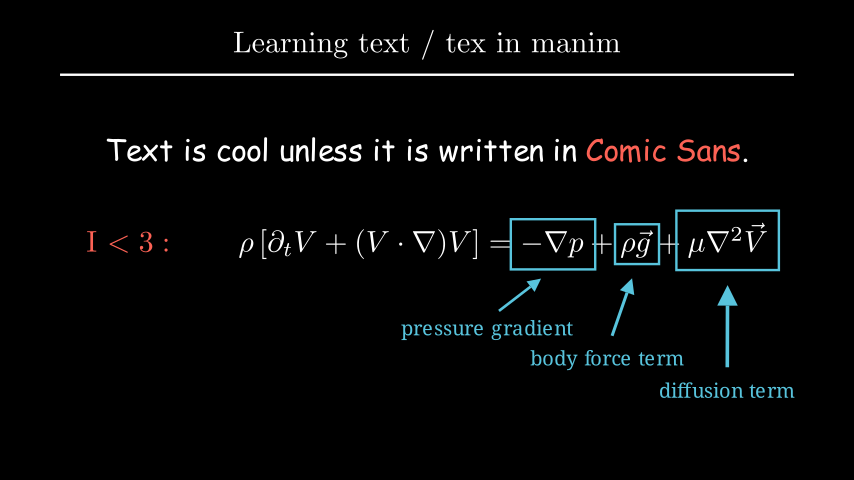

In [5]:
%%manim -ql --fps 60 -v WARNING --disable_caching text_Scene


class text_Scene(Scene):
	def construct(self):
		# defining an underlined title (cool feature I only found out about far too late)
		first_title = Title("Learning text / tex in manim")

		# defining a text with string 'Comic Sans' colored in 'RED' 
		first_text = Text("Text is cool unless it is written in Comic Sans.", font = "Comic Sans MS", font_size = 36, t2c = {"Comic Sans": RED}).shift(1.5*UP)

		# writing out our favourite equation (obviously Navier Stokes) 
		navier_stokes = Tex(r"I $<3:\qquad\rho\left[\partial_tV+(V\cdot\nabla)V\right]=-\nabla p+\rho\Vec{g}+\mu\nabla^2\vec{V}$").next_to(first_text, 4*DOWN)
		# coloring parts of the string 'RED': the first index selects the string, the second one slices the desired characters
		navier_stokes[0][0:4].set_color(RED)

		# marking the individual terms of the Navier Stokes with surrounding boxes
		pressure_gradient_box = SurroundingRectangle(navier_stokes[0][18:21], buff = 0.2, color = BLUE)
		body_force_term_box = SurroundingRectangle(navier_stokes[0][22:24], buff = 0.1, color = BLUE)
		diffusion_term_box = SurroundingRectangle(navier_stokes[0][26:31], buff = 0.2, color = BLUE)

		# adding descriptions for the right hand side terms
		pressure_gradient_descriptor = Text("pressure gradient", color = BLUE, font_size = 24).move_to([1, -1.5, 0])
		body_force_term_descriptor = Text("body force term", color = BLUE, font_size = 24).move_to([3, -2, 0])
		diffusion_term_descriptor = Text("diffusion term", color = BLUE, font_size = 24).move_to([5, -2.5, 0])  

		# adding arrows pointing from the top of each descriptor to the bottom of the respective boxes
		pressure_gradient_arrow = Arrow(start = pressure_gradient_descriptor.get_top(), end = pressure_gradient_box.get_bottom(), color = BLUE)
		body_force_term_arrow = Arrow(start = body_force_term_descriptor.get_top(), end = body_force_term_box.get_bottom(), color = BLUE)
		diffusion_term_arrow = Arrow(start = diffusion_term_descriptor.get_top(), end = diffusion_term_box.get_bottom(), color = BLUE)

		# adding all mobjects to the scene
		self.add(first_title, first_text, navier_stokes)
		self.add(pressure_gradient_box, body_force_term_box, diffusion_term_box)
		self.add(pressure_gradient_descriptor, body_force_term_descriptor, diffusion_term_descriptor)
		self.add(pressure_gradient_arrow, body_force_term_arrow, diffusion_term_arrow)

### Coordinate Systems

Manims coordinate systems are a mighty tool, particularly for mathematical or physical animations. They allow for easy conversion between manims scene coordinates and the one of the resepctive coordinate systems or displaying plots:

* ``ax.c2p``: takes the 2 coordinates of ax and returns the position in the scene as an array
* ``ax.plot``: plots a given function in ax

Consequently, it is highly advised to use those pre-build coordinate systems and their [functions](https://docs.manim.community/en/stable/reference/manim.mobject.graphing.coordinate_systems.CoordinateSystem.html#manim.mobject.graphing.coordinate_systems.CoordinateSystem.get_origin) whenever possible.

What is often not so intuitive, is the configuration of the coordinate systems design (at least in my experience). However, in the following cell there are some ways to configure axis designs that can be copy-pasted and / or modified for personal use.

Manim Community v0.19.0

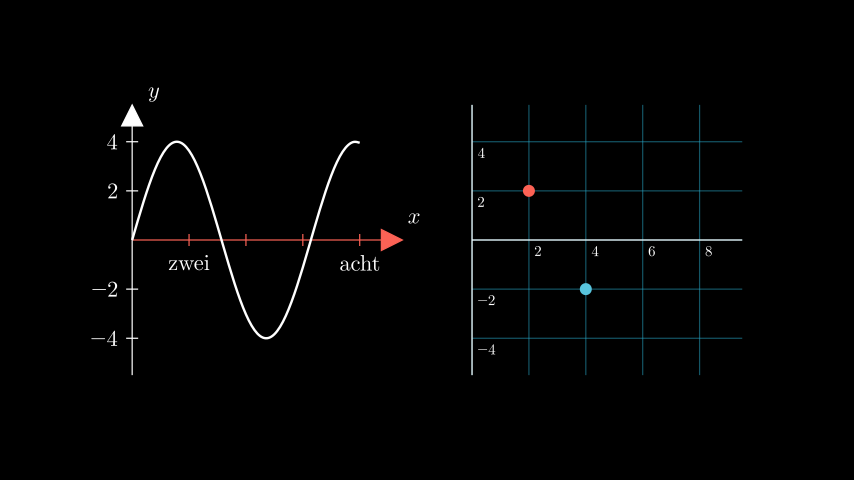

In [48]:
%%manim -ql --fps 60 -v WARNING --disable_caching axes_Scene


class axes_Scene(Scene):
	def construct(self):
		# defining the system size and range
		x_length = 4.5
		y_length = 4.5
		x_range = [0, 9.5, 2]
		y_range = [-5.5, 5.5, 2]

		# +++ left coordinate system +++

		# dictionary of x-coordinates with corresponding labels
		x_dict = dict(zip([2, 8], [r"zwei", r"acht"]))
		# defining the coordinate system
		ax = Axes(
			x_length = x_length, y_length = y_length, x_range = x_range, y_range = y_range,
			tips = True,
			# include axis numbers
			axis_config = {"include_numbers": True,},
			# coloring the x-axis red because I can (it does not look good), exluce x-axis numbers
			x_axis_config = {"stroke_color": RED, "include_numbers": False},		
			).move_to([-3, 0, 0]).add_coordinates(x_dict)

		# defining axis labels
		ax_xlabel = ax.get_x_axis_label(Tex(r"$x$", font_size = 36))
		ax_ylabel = ax.get_y_axis_label(Tex(r"$y$", font_size = 36))
		# addig all objects belonging to the coordinate system to one virtual group that can be added as a whole
		coordinate_system = VGroup(ax, ax_xlabel, ax_ylabel)

		# adding a function to the coordinate system on the left
		func1 = ax.plot(lambda x: 4*np.sin(x), x_range = [0, 8])

		# +++ right number plane +++

		# defining a number plane
		number_plane = NumberPlane(
			x_length = x_length, y_length = y_length, x_range = x_range, y_range = y_range,
			axis_config = {"include_numbers": True,},
			background_line_style = {"stroke_opacity": 0.5}
			).move_to([3, 0, 0])

		# placing some dots in the coordinate system on the right
		dot1_position = number_plane.c2p(2, 2)
		dot1 = Dot(radius = 0.1, color = RED).move_to(dot1_position)

		dot2_position = number_plane.c2p(4, -2)
		dot2 = Dot(radius = 0.1, color = BLUE).move_to(dot2_position)

		self.add(coordinate_system, number_plane)
		self.add(func1, dot1, dot2)

## 1.2. Animations

### Animated Adding / Removing

Besides simply adding mobjects (i.e. they are just there), one can use animated appearances. The most straighforward ones can be found in the following notebook cell:

* ``Write`` / ``Unwrite``
* ``FadeIn`` / ``FadeOut``
* ``Create`` / ``Uncreate``

In [ ]:
%%manim -ql --fps 60 -v WARNING --disable_caching animated_Scene


class animated_Scene(Scene):
	def construct(self):
		# defining an underlined title (cool feature I only found out about far too late)
		headline = Title("Written Headline").align_on_border(UP)

		# defining a quare
		square = Square(side_length = 2, color = RED, fill_opacity = 0.25).shift(4*LEFT)

		# defining a circe
		circle = Circle(radius = 1, color = BLUE, fill_opacity = 0.25).shift(4*RIGHT)


		self.wait(0.5)
		# for text the animation type 'Write' is convenient
		self.play(Write(headline), run_time = 3)
		self.wait(1)

		# the simplest way to add mobjects animated in just to fade the in
		self.play(FadeIn(square), run_time = 3)
		self.wait(1)

		# a fancier way is to use 'Create'
		self.play(Create(circle), run_time = 3)
		self.wait(1)


		# all these animations can be reversed to remove the mobjects
		self.play(Unwrite(headline), FadeOut(square), Uncreate(circle), run_time = 3)
		self.wait(3)

Manim Community v0.19.0

### Transformations

There are several ways to transform one mobject into another and they only differ marginally.

In [39]:
%%manim -ql --fps 60 -v WARNING --disable_caching transformation_Scene


class transformation_Scene(Scene):
	def construct(self):
		# defining and adding headlines
		english_text_up = Text("This text is english.", font_size = 36, color = RED).align_on_border(LEFT).shift(3*UP)
		nepali_text_up = Text("यो कुरा कसैले बुझ्नेछ", font_size = 36, color = BLUE).align_on_border(RIGHT).shift(3*UP)
		self.add(english_text_up, nepali_text_up)

		headline_transform = Title("Transform").align_on_border(UP).shift(1.5*DOWN)
		headline_fade = Title("FadeTransform").align_on_border(UP).shift(4*DOWN)
		self.add(headline_transform, headline_fade)

		# text to be transformed
		english_text_transform = Text("This text is english.", font_size = 36, color = RED).align_on_border(LEFT).shift(0.75*UP)
		nepali_text_transform = Text("यो कुरा कसैले बुझ्नेछ", font_size = 36, color = BLUE).align_on_border(RIGHT).shift(0.75*UP)

		# text to be fade-transformed
		english_text_fade = Text("This text is english.", font_size = 36, color = RED).align_on_border(LEFT).shift(1.75*DOWN)
		nepali_text_fade = Text("यो कुरा कसैले बुझ्नेछ", font_size = 36, color = BLUE).align_on_border(RIGHT).shift(1.75*DOWN)


		# performing the transformations for comparison
		self.add(english_text_transform, english_text_fade)
		self.wait(0.5)
		self.play(Transform(english_text_transform, nepali_text_transform), FadeTransform(english_text_fade, nepali_text_fade), run_time = 3)
		self.wait(3)

Manim Community v0.19.0

### Animated Movement / Scaling

For basic movements of mobjects, the method ``animate.shift`` can be used. However, more often than not one would prefer using ``ValueTracker`` and ``Updater`` for this job than will be introduced in the second chapter. Down- und upscaling of mobjects works similary to the shifting via ``animate.scale``.

In [ ]:
%%manim -ql --fps 60 -v WARNING --disable_caching movement_Scene


class movement_Scene(Scene):
	def construct(self):
		# defining a circe
		circle = Circle(radius = 1, color = BLUE, fill_opacity = 0.25).shift(2*LEFT)

		# shifting and rescaling the above circel
		self.wait(0.5)
		self.play(circle.animate.shift(4*RIGHT), run_time = 3)
		self.wait(0.5)
		self.play(circle.animate.scale(2), run_time = 3)

		# also both can be combined
		self.wait(0.5)
		self.play(circle.animate.scale(0.5).shift(2*LEFT), run_time = 3)
		self.wait(3)

Manim Community v0.19.0